# Manually creating a Dataframe or Series

In [ ]:
import pandas as pd

In [ ]:
# Manually creating a series
students = ['Alice', 'Jack', 'Molly']

# Now we just call the Series function in pandas and pass in the students
pd.Series(students)

In [ ]:
numbers = [1, 2, 3]
# And turn that into a series
pd.Series(numbers)

In [ ]:
#creating series with a specific index
s = pd.Series(['Physics', 'Chemistry', 'English'], index=['Alice', 'Jack', 'Molly'])
s

In [ ]:
#Creating a series with specific index but using a dictionary
students_scores = {'Alice': 'Physics',
                   'Jack': 'Chemistry',
                   'Molly': 'English'}
# When I create the series object though I'll only ask for an index with three students, and
# excluding Jack
s = pd.Series(students_scores, index=['Alice', 'Molly', 'Sam'])
s

In [ ]:
s[2]

In [ ]:
#One could use loc definitions to access the data
print(s.loc['Molly'],s['Molly'])

## Concatenation and non-unique indexes

In [ ]:
# Up until now I've shown only examples of a series where the index values were unique. I want 
# to end this section by showing an example where index values are not unique, and this makes 
# pandas Series a little different conceptually then, for instance, a relational database.

# Lets create a Series with students and the courses which they have taken
students_classes = pd.Series({'Alice': 'Physics',
                   'Jack': 'Chemistry',
                   'Molly': 'English',
                   'Sam': 'History'})
students_classes

In [ ]:
# Now lets create a Series just for some new student Kelly, which lists all of the courses
# she has taken. We'll set the index to Kelly, and the data to be the names of courses.
kelly_classes = pd.Series(['Philosophy', 'Arts', 'Math'], index=['Kelly', 'Kelly', 'Kelly'])
kelly_classes

In [ ]:
# Finally, we can append all of the data in this new Series to the first using the .append()
# function.
all_students_classes = pd.concat([students_classes,kelly_classes])

# This creates a series which has our original people in it as well as all of Kelly's courses
all_students_classes

In [ ]:
all_students_classes['Kelly']

## Question: Why is it important to be aware of non-unique indexes when concatenating DataFrames? What issues might arise if indexes are not unique?


# Dataframes

In [ ]:
students = [{'Name': 'Alice',
              'Class': 'Physics',
              'Score': 85},
            {'Name': 'Jack',
             'Class': 'Chemistry',
             'Score': 82},
            {'Name': 'Helen',
             'Class': 'Biology',
             'Score': 90}]

# Then we pass this list of dictionaries into the DataFrame function
df = pd.DataFrame(students, index=['school1', 'school2', 'school1'])
# And lets print the head again
df.head()


In [ ]:
# Similar to the series, we can extract data using the .iloc and .loc attributes. Because the 
# DataFrame is two-dimensional, passing a single value to the loc indexing operator will return 
# the series if there's only one row to return.

# For instance, if we wanted to select data associated with school2, we would just query the 
# .loc attribute with one parameter.
df.loc['school2']

# You'll note that the name of the series is returned as the index value, while the column 
# name is included in the output.

## Common misconceptions, question time

In [ ]:
#Why does the following command fails?
#df['school2']

## Question: What are the differences between a Pandas Series and a DataFrame? Can you give an example of when you might use each?

In [ ]:
# We can check the data type of the return using the python type function.
type(df.loc['school2'])

In [ ]:
# It's important to remember that the indices and column names along either axes horizontal or 
# vertical, could be non-unique. In this example, we see two records for school1 as different rows.
# If we use a single value with the DataFrame lock attribute, multiple rows of the DataFrame will 
# return, not as a new series, but as a new DataFrame.

# Lets query for school1 records
df.loc['school1']

In [ ]:
# One of the powers of the Panda's DataFrame is that you can quickly select data based on multiple axes.
# For instance, if you wanted to just list the student names for school1, you would supply two 
# parameters to .loc, one being the row index and the other being the column name.

# For instance, if we are only interested in school1's student names
# Important to note, it only works with different axes, i.e., an index (one type of the rows) and a column

df.loc['school1', 'Name']

In [ ]:
# Remember, just like the Series, the pandas developers have implemented this using the indexing
# operator and not as parameters to a function.

# What would we do if we just wanted to select a single column though? Well, there are a few
# mechanisms. Firstly, we could transpose the matrix. This pivots all of the rows into columns
# and all of the columns into rows, and is done with the T attribute
df.T

In [ ]:
# Then we can call .loc on the transpose to get the student names only
df.T.loc['Name']

In [ ]:
# However, since iloc and loc are used for row selection, Panda reserves the indexing operator 
# directly on the DataFrame for column selection. In a Panda's DataFrame, columns always have a name. 
# So this selection is always label based, and is not as confusing as it was when using the square 
# bracket operator on the series objects. For those familiar with relational databases, this operator 
# is analogous to column projection.
df['Name']

In [ ]:
# You can select multiple columns if you put them in a list.
df[['Name','Class']]

## Interacting with dataframes

In [ ]:
# Before we leave the discussion of accessing data in DataFrames, lets talk about dropping data.
# It's easy to delete data in Series and DataFrames, and we can use the drop function to do so. 
# This function takes a single parameter, which is the index or row label, to drop. This is another 
# tricky place for new users -- the drop function doesn't change the DataFrame by default! Instead,
# the drop function returns to you a copy of the DataFrame with the given rows removed.

df.drop('school1')

In [ ]:
# But if we look at our original DataFrame we see the data is still intact.
df

In [ ]:
# Drop has two interesting optional parameters. The first is called inplace, and if it's 
# set to true, the DataFrame will be updated in place, instead of a copy being returned. 
# The second parameter is the axes, which should be dropped. By default, this value is 0, 
# indicating the row axis. But you could change it to 1 if you want to drop a column.

# For example, lets make a copy of a DataFrame using .copy()
copy_df = df.copy()
# Now lets drop the name column in this copy
copy_df.drop("Name", inplace=True, axis=1)
copy_df

In [ ]:
# There is a second way to drop a column, and that's directly through the use of the indexing 
# operator, using the del keyword. This way of dropping data, however, takes immediate effect 
# on the DataFrame and does not return a view.
del copy_df['Class']
copy_df

In [ ]:
# Finally, adding a new column to the DataFrame is as easy as assigning it to some value using
# the indexing operator. For instance, if we wanted to add a class ranking column with default 
# value of None, we could do so by using the assignment operator after the square brackets.
# This broadcasts the default value to the new column immediately.

df['ClassRanking'] = None
df

In [ ]:
# Pandas mades it easy to turn a CSV into a dataframe, we just call read_csv()
#df = pd.read_csv('Admission_Predict.csv')
df = pd.read_csv('https://raw.githubusercontent.com/calovids/IMPRS-Python-Workshop/main/data/Admission_Predict.csv')

# And let's look at the first few rows
df.head()

In [ ]:
# We notice that by default index starts with 0 while the students' serial number starts from 1. If you jump
# back to the CSV output you'll deduce that pandas has create a new index. Instead, we can set the serial no.
# as the index if we want to by using the index_col.
#df = pd.read_csv('Admission_Predict.csv', index_col=0)
df = pd.read_csv('https://raw.githubusercontent.com/calovids/IMPRS-Python-Workshop/main/data/Admission_Predict.csv', index_col=0)
df.head()

### Renaming variables

In [ ]:
# Notice that we have two columns "SOP" and "LOR" and probably not everyone knows what they mean So let's
# change our column names to make it more clear. In Pandas, we can use the rename() function It takes a
# parameter called columns, and we need to pass into a dictionary which the keys are the old column name and
# the value is the corresponding new column name
new_df=df.rename(columns={'SOP': 'Statement of Purpose',
                          'LOR': 'Letter of Recommendation'})
new_df.head()

In [ ]:
#Note that it didn't seem to change the LOR variable, let's have a look why:
new_df.columns

In [ ]:
# We can create some function that does the cleaning of variables and then tell renamed to apply that function
# across all of the data. Python comes with a handy string function to strip white space called "strip()".
# When we pass this in to rename we pass the function as the mapper parameter, and then indicate whether the
# axis should be columns or index (row labels)
new_df=new_df.rename(mapper=str.strip, axis='columns')
# Let's take a look at results
new_df.head()

In [ ]:
new_df=new_df.rename(columns={'SOP': 'Statement of Purpose',
                              'LOR': 'Letter of Recommendation'})
new_df.head()
#let's save this for later:
AdmissionDF=new_df.copy()

In [ ]:
# One nice feature of Pandas is multi-level indexing. This is similar to composite keys in 
# relational database systems. To create a multi-level index, we simply call set index and 
# give it a list of columns that we're interested in promoting to an index.

# Pandas will search through these in order, finding the distinct data and form composite indices.
# A good example of this is often found when dealing with geographical data which is sorted by 
# regions or demographics.

# Let's change data sets and look at some census data for a better example. This data is stored in 
# the file census.csv and comes from the United States Census Bureau. In particular, this is a 
# breakdown of the population level data at the US county level. It's a great example of how 
# different kinds of data sets might be formatted when you're trying to clean them.

# Let's import and see what the data looks like
#df = pd.read_csv('census.csv')
df = pd.read_csv('https://raw.githubusercontent.com/calovids/IMPRS-Python-Workshop/main/data/census.csv')
df.head()

In [ ]:
print(df['SUMLEV'].unique())
#Keeping only the information that is not summarized by state
df=df[df['SUMLEV'] == 50]
df.head()

### Dual indexing

In [ ]:
# The US Census data breaks down population estimates by state and county. We can load the data and 
# set the index to be a combination of the state and county values and see how pandas handles it in 
# a DataFrame. We do this by creating a list of the column identifiers we want to have indexed. And then 
# calling set index with this list and assigning the output as appropriate. We see here that we have 
# a dual index, first the state name and second the county name.

df_state = df.set_index(['STNAME', 'CTYNAME'])
df_state.head()

### Masks and conditional filtering

In [ ]:
#We can also create conditional masks according to the data
admit_mask=df_state['ESTIMATESBASE2010'] > 28000
admit_mask

In [ ]:
# So, what do you do with the boolean mask once you have formed it? Well, you can just lay it on top of the
# data to "hide" the data you don't want, which is represented by all of the False values. We do this by using
# the .where() function on the original DataFrame.
df_state.where(admit_mask)

In [ ]:
#But that looks very messy, we can drop all the NaN entries:
df_state.where(admit_mask).dropna()

In [ ]:
#Or, much more commonly used:
df_state[admit_mask]

In [ ]:
#Also very common, but more messy
df_state[df_state['ESTIMATESBASE2010'] > 28000]

In [ ]:
#Multiple conditions can quickly get out of hand for readability, also not different way to express conditions
df_state[ (df_state['STATE'] > 50) & (df_state['ESTIMATESBASE2010']>28000)]

In [ ]:
#One could notice something weird about the values of the state variable, we can quickly investigate it
print(len(df_state['STATE'].unique()))
df_state['STATE'].unique()

### Question:

In [ ]:
#But attention, this will fail, why?
#df_state[['STNAME','STATE']].unique()

In [ ]:
df_state

In [ ]:
#The variables we wanted are now indexes,
df[['STNAME','STATE']].drop_duplicates()


### Masks

In [ ]:
Mask=df_state['ESTIMATESBASE2010'].gt(28000) &df_state['ESTIMATESBASE2010'].lt(100000)
df_state[Mask]

### Group level measures - Groupby

In [ ]:
df_state[['ESTIMATESBASE2010','POPESTIMATE2011']].groupby(level='STNAME').mean()

### Calculating new metrics - apply()

In [ ]:
# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie'],
    'Math': [92, 78, 85],
    'Science': [88, 82, 90],
    'English': [72, 75, 78]
}

df = pd.DataFrame(data)

In [ ]:
#This DataFrame contains scores for three subjects: Math, Science, and English.
#Now, let's say the Performance Score is calculated as the average of the
#three subjects, but with double weightage given to Math.

def calculate_performance_score(row):
    return (2 * row['Math'] + row['Science'] + row['English']) / 4

df['Performance Score'] = df.apply(calculate_performance_score, axis=1)
df


In [ ]:
#While apply() is powerful, it's often slower than using vectorized operations.
#Use it when vectorized operations are not available, but always look for a
#vectorized solution first

# Calculating Performance Score using vectorized operations
df['Performance Score Vectorized'] = (2 * df['Math'] + df['Science'] + df['English']) / 4
df

### Question: What are some common methods used for inspecting or summarizing the contents of a DataFrame?

### Question: Can you explain how to select a specific column or row from a DataFrame? What is the difference between loc and iloc?


## Plotting Dataframes

/home/calovi/anconda32023/lib/python3.11/site-packages/pandas/plotting/_matplotlib/core.py:509: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig = self.plt.figure(figsize=self.figsize)


STNAME
Alabama                 Axes(0.125,0.11;0.775x0.77)
Alaska                  Axes(0.125,0.11;0.775x0.77)
Arizona                 Axes(0.125,0.11;0.775x0.77)
Arkansas                Axes(0.125,0.11;0.775x0.77)
California              Axes(0.125,0.11;0.775x0.77)
Colorado                Axes(0.125,0.11;0.775x0.77)
Connecticut             Axes(0.125,0.11;0.775x0.77)
Delaware                Axes(0.125,0.11;0.775x0.77)
District of Columbia    Axes(0.125,0.11;0.775x0.77)
Florida                 Axes(0.125,0.11;0.775x0.77)
Georgia                 Axes(0.125,0.11;0.775x0.77)
Hawaii                  Axes(0.125,0.11;0.775x0.77)
Idaho                   Axes(0.125,0.11;0.775x0.77)
Illinois                Axes(0.125,0.11;0.775x0.77)
Indiana                 Axes(0.125,0.11;0.775x0.77)
Iowa                    Axes(0.125,0.11;0.775x0.77)
Kansas                  Axes(0.125,0.11;0.775x0.77)
Kentucky                Axes(0.125,0.11;0.775x0.77)
Louisiana               Axes(0.125,0.11;0.775x0.77)
Maine

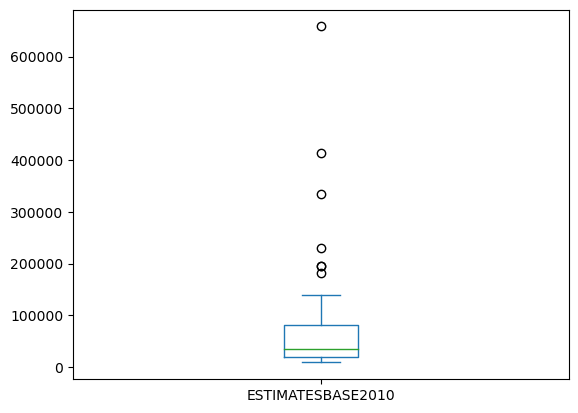

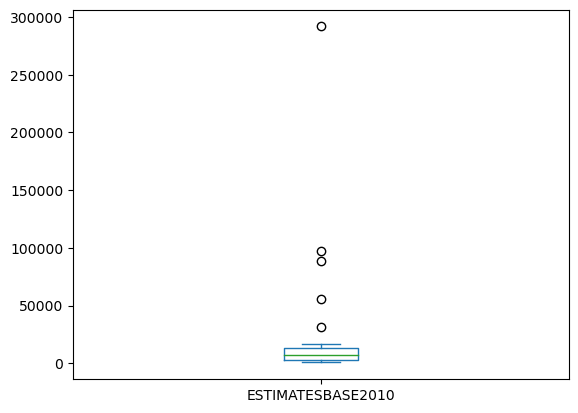

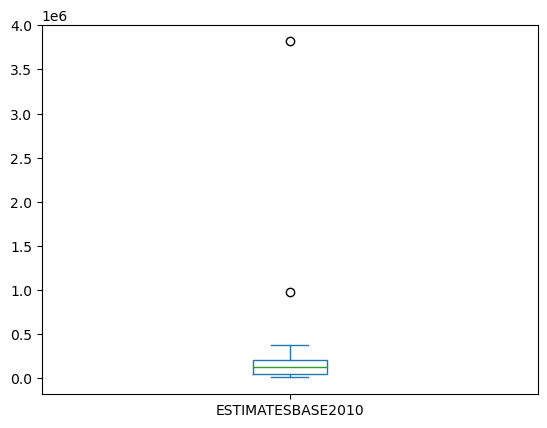

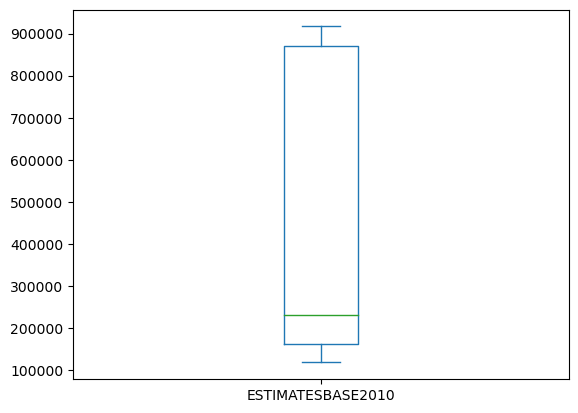

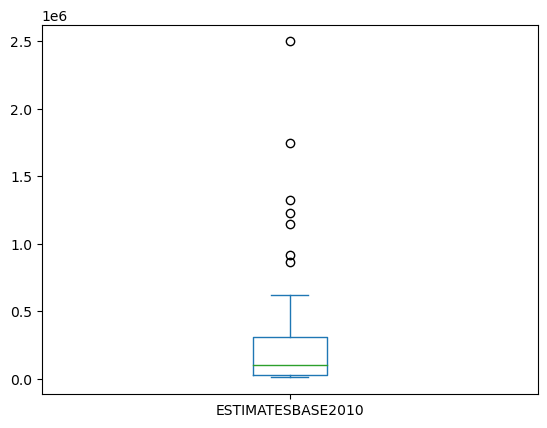

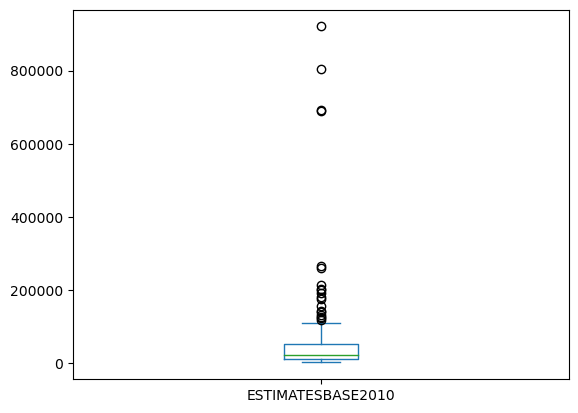

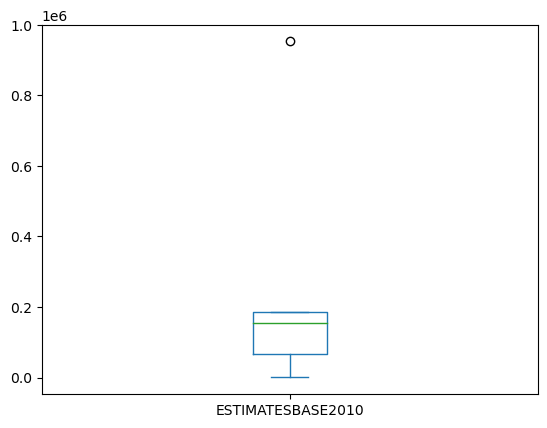

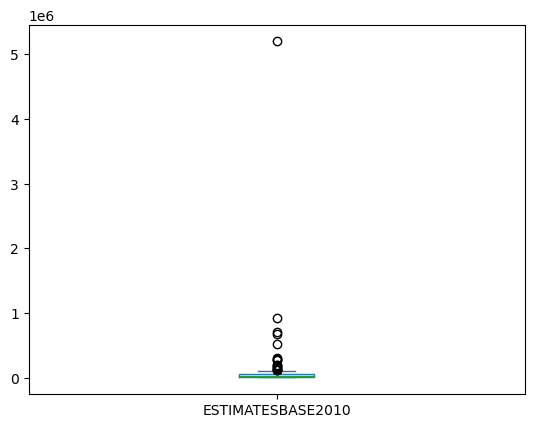

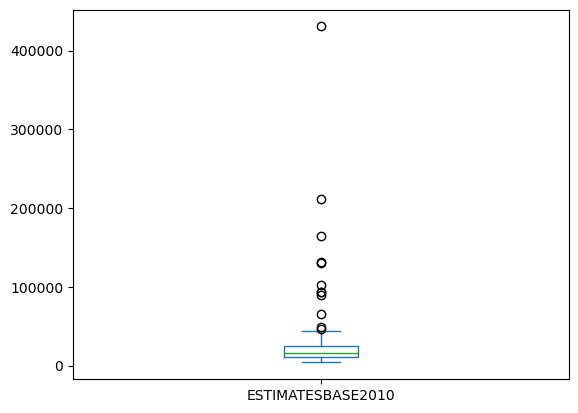

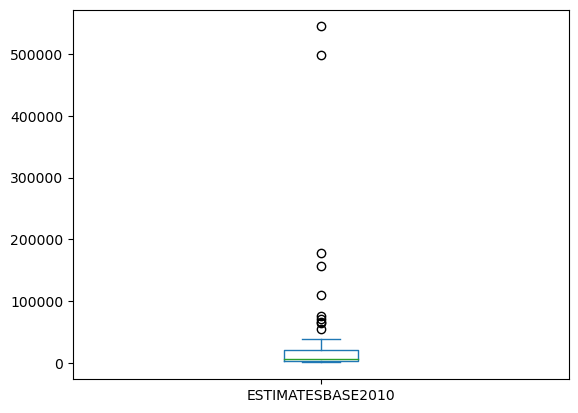

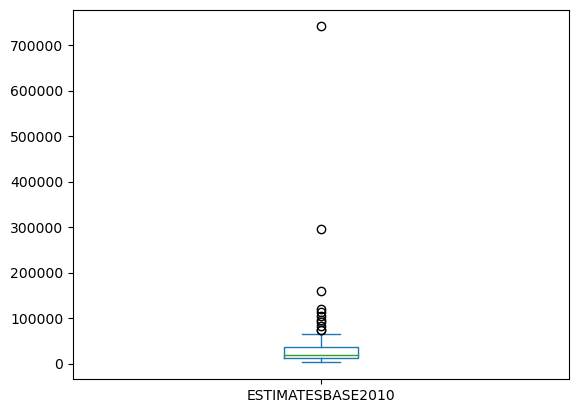

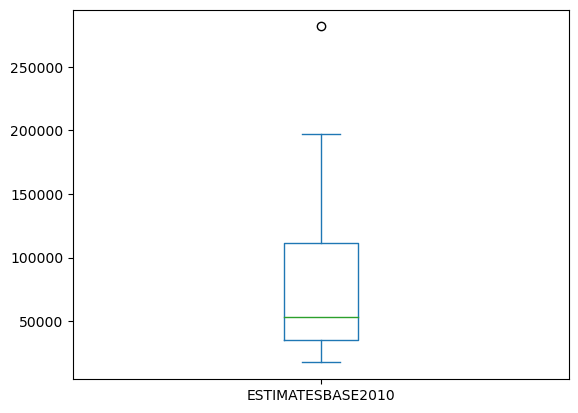

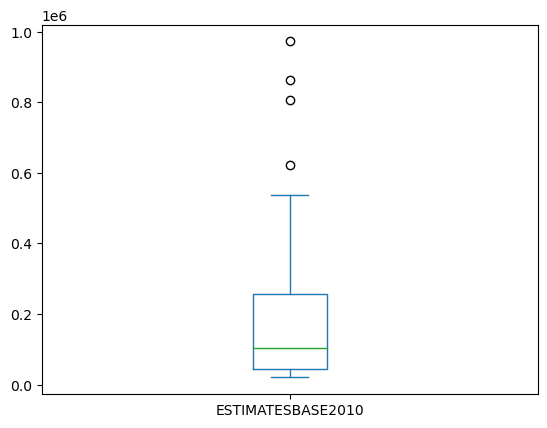

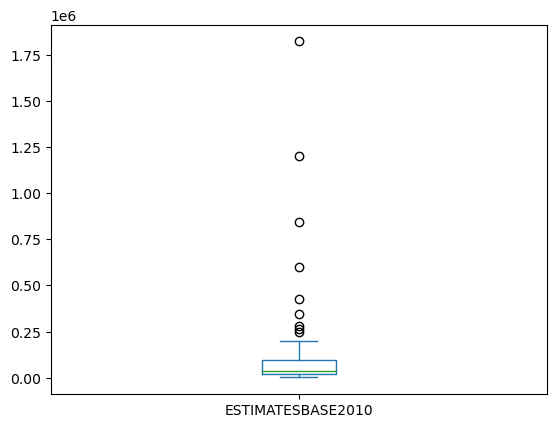

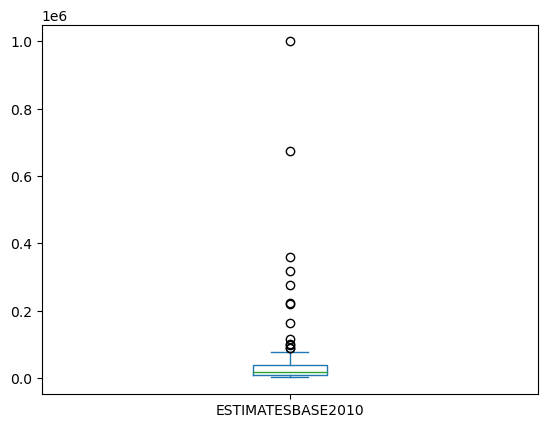

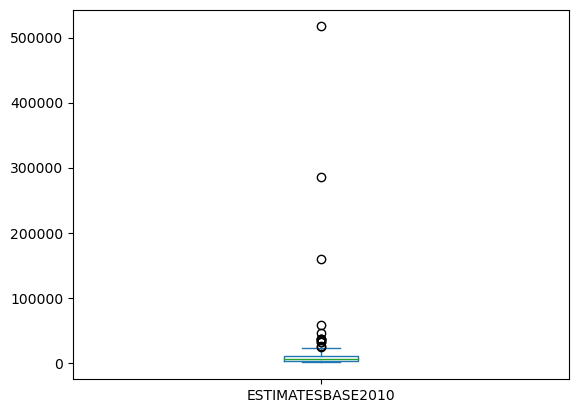

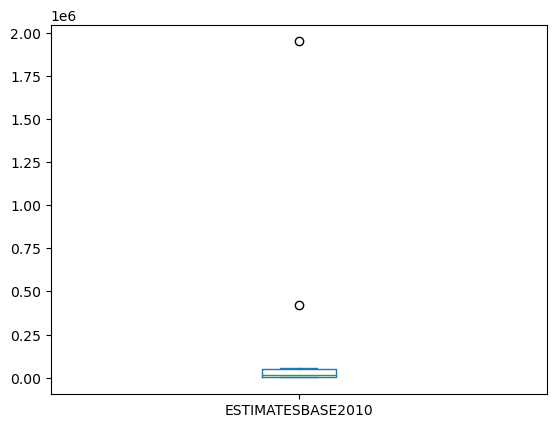

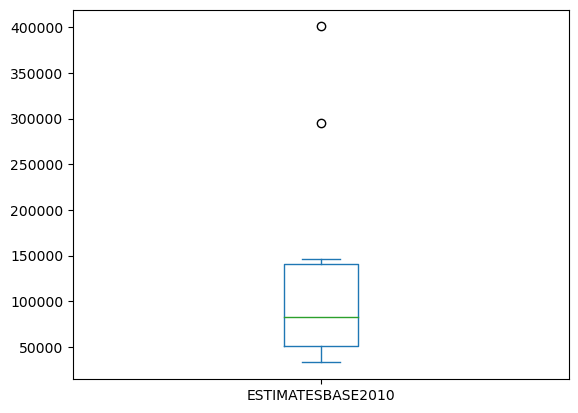

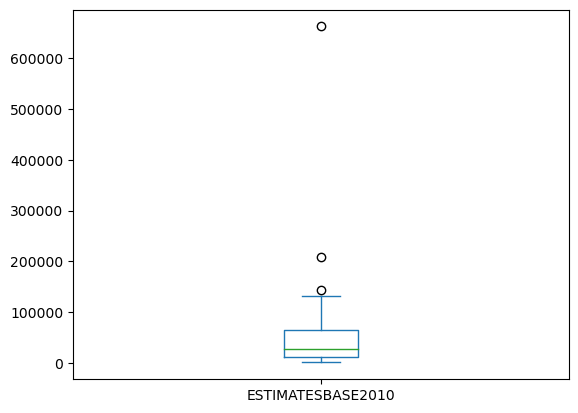

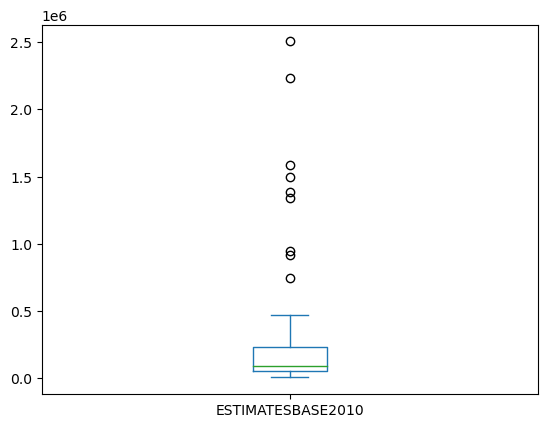

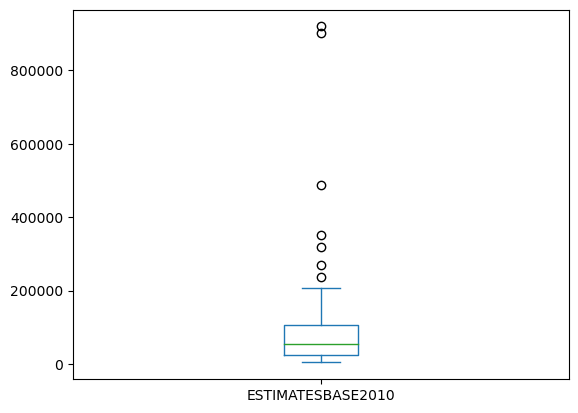

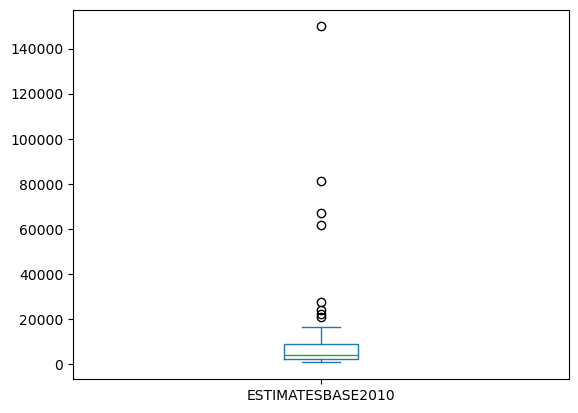

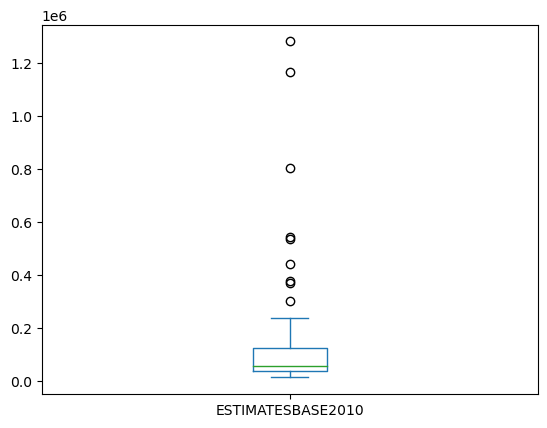

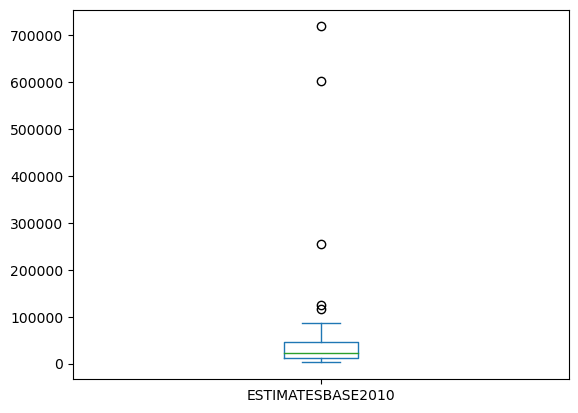

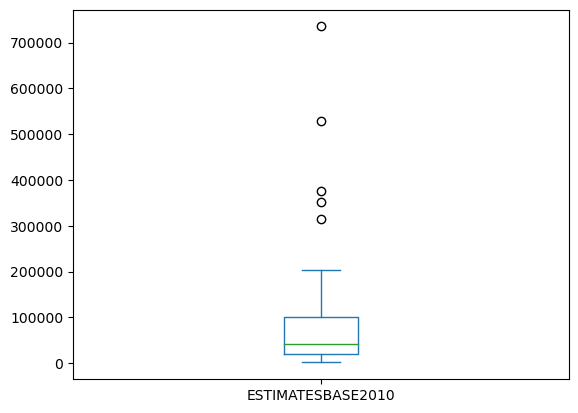

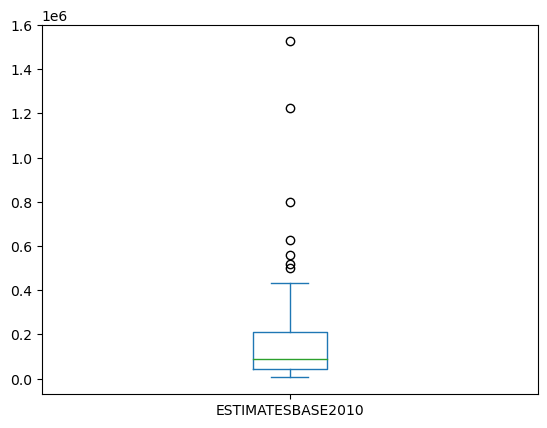

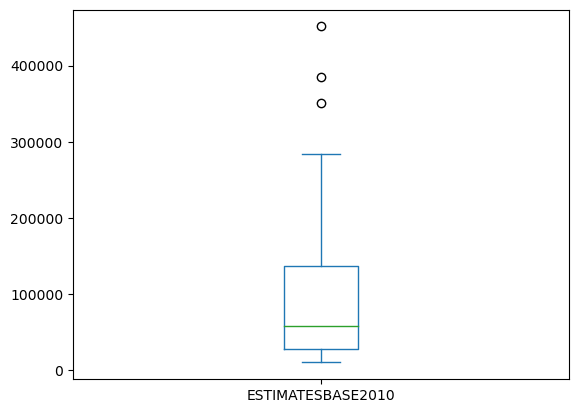

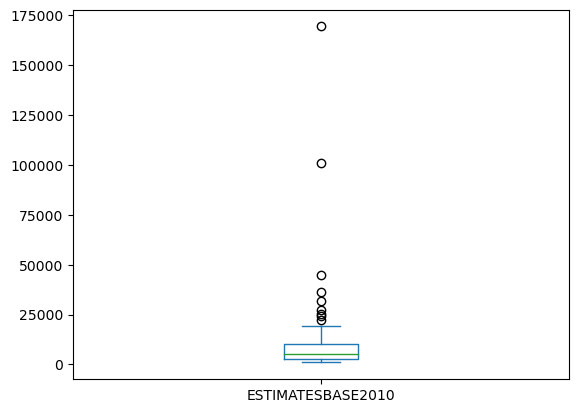

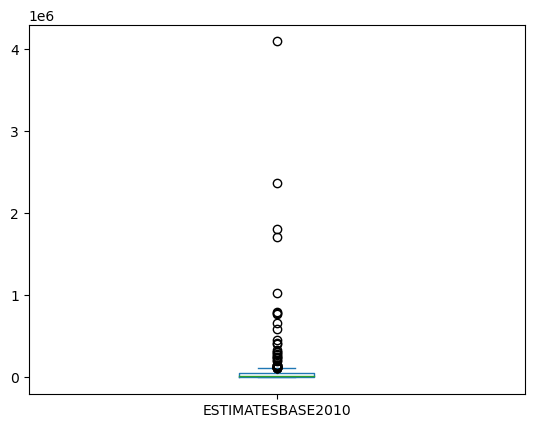

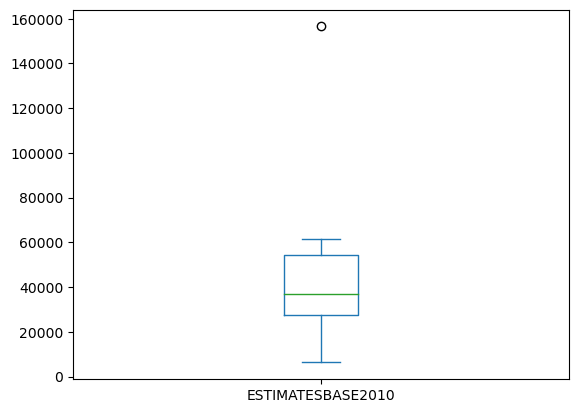

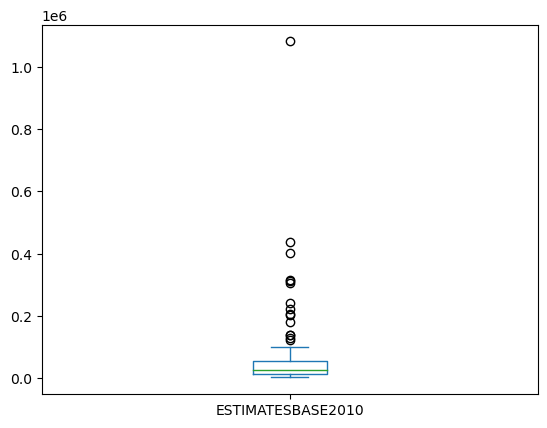

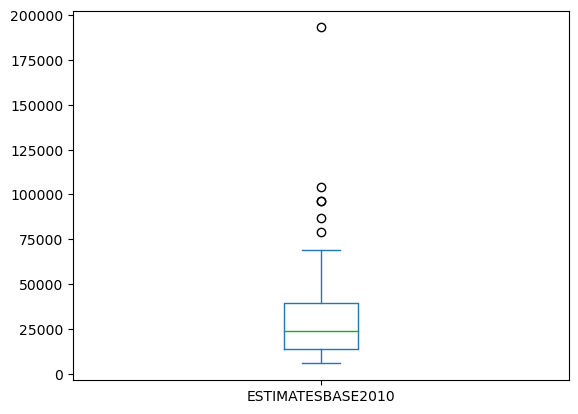

In [68]:

df_state[['ESTIMATESBASE2010']].groupby(level='STNAME').plot.box()

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

Newdf=df_state[df_state['STATE']>45]
fig, ax = plt.subplots(figsize=(15, 6))
Fig=sns.boxplot(x='STNAME', y='ESTIMATESBASE2010', data=Newdf)
Fig.set_ylim([0,3e5])






ValueError: Could not interpret input 'STNAME'

# Methods

In [ ]:
df = pd.DataFrame({'A': [1, 2, 3], 'B': [4, 5, 6]})
# List all methods and attributes of the DataFrame
all_methods_and_attributes = dir(df)

# To print or process this list, you can simply iterate over it
for item in all_methods_and_attributes:
    print(item)

In [ ]:
#getting help directly in your notebook
help(df.drop_duplicates)

In [ ]:
#useful methods
AdmissionDF.info()


# Basic statistics

In [ ]:
#Remember our Admission dataset?
AdmissionDF


## Correlation

In [ ]:
# Using the pearson correlation function one can easily check how similar two variables are:
# Remember how to get help in a function?
help(AdmissionDF.corr)

In [ ]:
print('Correlation between GRE and admission probability ',AdmissionDF['GRE Score'].corr(AdmissionDF['Chance of Admit']))
print('Correlation between GRE Score and LOR',AdmissionDF['GRE Score'].corr(AdmissionDF['Letter of Recommendation']))
print('Correlation between University Rating and LOR',AdmissionDF['University Rating'].corr(AdmissionDF['Letter of Recommendation']))


## T-tests

In [ ]:
import numpy as np
from scipy import stats

# Generating artificial data
group1 = np.random.normal(1, 1, 100)
group2 = np.random.normal(1.1, 1, 100)
t_statistic, p_value = stats.ttest_ind(group1, group2)
print("T-statistic:", t_statistic)
print("p-value:", p_value)

In [ ]:
# But what happens when we have too much data

group1 = np.random.normal(1, 1, 1000)
group2 = np.random.normal(1.1, 1, 1000)
t_statistic, p_value = stats.ttest_ind(group1, group2)
print("T-statistic:", t_statistic)
print("p-value:", p_value)

In [ ]:
# But what happens when we have too much data

# Loop over different data sizes (100, 1000, 10000, 100000)
for exponent in range(2, 8):
    n = 10 ** exponent    # Generate two normally distributed datasets
    group1 = np.random.normal(1, 1, n)
    group2 = np.random.normal(1.001, 1, n)

    # Perform an independent t-test
    t_statistic, p_value = stats.ttest_ind(group1, group2)

    # Print the results
    print(f"Data Points: {n}")
    print(f"T-statistic: {t_statistic}")
    print(f"P-value: {p_value}\n")


# Final challenge - Mean square displacement, random walk

In [ ]:
##Fill out the 4 XXX_Your_Answer_Here_XXX fields
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def generate_walkers(n_walkers, diffusion_coefficient, n_steps):
    """
    Generate random walkers.

    Args:
    n_walkers (int): Number of random walkers.
    diffusion_coefficient (float): Diffusion coefficient for the random walk.
    n_steps (int): Number of steps for each walker.

    Returns:
    DataFrame: Pandas DataFrame containing the walker ID, step number, and x, y positions.
    """
    # Generate random steps for each walker
    steps = np.random.normal(loc=0, scale=np.sqrt(2 * diffusion_coefficient), size=(n_walkers, n_steps, 2))
    paths = np.cumsum(steps, axis=1)  # Cumulative sum to get the path

    # Creating a multi-index using the product of the number of walkers and the number of steps.
    # This creates a hierarchical index (WalkerID, Step) for the DataFrame.
    multi_index = pd.MultiIndex.from_product([range(n_walkers), range(n_steps)], names=['XXX_Your_Answer_Here_XXX', 'XXX_Your_Answer_Here_XXX'])

    # Reshape the paths array to a 2D array suitable for a DataFrame
    # and create the DataFrame with the multi-index.
    df = pd.DataFrame(paths.reshape(-1, 2), index=multi_index, columns=['X', 'Y'])

    return df

def calculate_msd_by_t(df, n_steps):
    """
    Calculate the mean square displacement by time step.

    Args:
    df (DataFrame): DataFrame containing walker data.
    n_steps (int): Number of steps.

    Returns:
    DataFrame: DataFrame with mean square displacement for each time step.
    """
    # Use transform('first') to align each walker's start position to the origin (0,0).
    # This subtracts the initial position of each walker from all its positions.
    displacement_sq = (df - df.groupby(level='XXX_Your_Answer_Here_XXX').transform('first'))**2

    # Sum the squared displacements in x and y, then calculate the mean for each time step.
    msd_by_t = displacement_sq.sum(axis=1).groupby('XXX_Your_Answer_Here_XXX').mean()

    return msd_by_t

def plot_msd_by_t(msds, title):
    """
    Plot the mean square displacement by time step in a log-log plot.

    Args:
    msds (list of DataFrames): List of DataFrames containing MSD for different diffusion coefficients.
    title (str): Title for the plot.
    """
    plt.figure(figsize=(10, 6))
    for msd, label in msds:
        plt.loglog(msd.index, msd, marker='o', linestyle='-', label=f'Diffusion Coefficient: {label}')
    plt.xlabel('Time step (\u0394t)')
    plt.ylabel('Mean Square Displacement')
    plt.title(title)
    plt.legend()
    plt.show()

# Example usage
diffusion_coefficients = [0.1, 0.5, 1.0, 2.0]
n_walkers = 100
n_steps = 100

msds_by_t = []
for d in diffusion_coefficients:
    df = generate_walkers(n_walkers, d, n_steps)
    msd_by_t = calculate_msd_by_t(df, n_steps)
    msds_by_t.append((msd_by_t, d))

plot_msd_by_t(msds_by_t, 'Mean Square Displacement by Time Step (Log-Log Plot)')

